<a href="https://colab.research.google.com/github/Mike37Jet/Agente-Inteligente/blob/master/AnalisisDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerias** ⛳

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Cargar Datos

In [4]:
df = pd.read_csv("properati_argentina_2021_tp1.csv")

El modelo no trabaja con variables dependientes.

Todos los modelos de aprendizaje supervisado solo existe los modelos de regresion y clasificacion, las metricas cambias de uno con otro.

**Regresion:** Precios, Valores numericos infinito

**Clasificacion:** El valor a predecir es un valor categórico

**Resolucion:**
Lineal y No lineal

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82507 entries, 0 to 82506
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   82507 non-null  float64
 1   longitud                  82507 non-null  float64
 2   place_l3                  82507 non-null  object 
 3   property_type             82507 non-null  object 
 4   property_rooms            82507 non-null  int64  
 5   property_bedrooms         82507 non-null  int64  
 6   property_surface_total    82507 non-null  float64
 7   property_surface_covered  82507 non-null  float64
 8   property_price            82507 non-null  float64
 9   pxm2                      82507 non-null  float64
 10  tipo_precio               82507 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 6.9+ MB


In [6]:
df.describe()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2
count,82507.000000,82507.000000,82507.000000,82507.000000,82507.000000,82507.000000,8.250700e+04,82507.000000
mean,-34.596450,-58.439389,2.810562,1.899899,91.891221,76.739078,2.097920e+05,2305.920237
std,0.025977,0.037881,1.368555,1.033381,106.966857,76.534263,2.347240e+05,831.774177
min,-34.689943,-58.529931,1.000000,1.000000,4.004009,1.000000,5.000000e+03,13.000000
25%,-34.615668,-58.466686,2.000000,1.000000,45.000000,40.000000,9.500000e+04,1759.000000
50%,-34.595952,-58.439740,3.000000,2.000000,65.000000,57.000000,1.400000e+05,2212.000000
75%,-34.578361,-58.409740,4.000000,3.000000,104.000000,87.000000,2.300000e+05,2726.000000
max,-34.535964,-58.343239,17.000000,14.000000,6470.000000,4809.000000,3.200000e+06,5493.000000


La **media** es iportante para hacer un modelo de regresion.
Siempre quiero obtener el **error absoluto** por debajo de la media.

**Desviacion estandar**: en modelos supervisados se necesita un desviacion estandar homogenea.


array([[<Axes: title={'center': 'latitud'}>,
        <Axes: title={'center': 'longitud'}>,
        <Axes: title={'center': 'property_rooms'}>],
       [<Axes: title={'center': 'property_bedrooms'}>,
        <Axes: title={'center': 'property_surface_total'}>,
        <Axes: title={'center': 'property_surface_covered'}>],
       [<Axes: title={'center': 'property_price'}>,
        <Axes: title={'center': 'pxm2'}>, <Axes: >]], dtype=object)

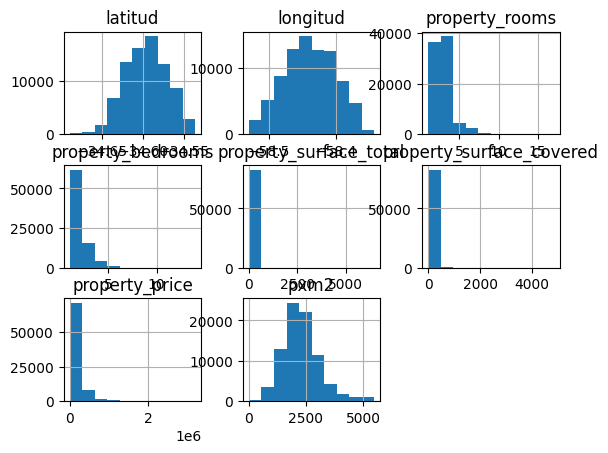

In [7]:
df.hist()

In [8]:
df = df.drop(columns=['latitud','longitud'])

In [9]:
df

,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
0,Palermo,Casa,4,3,171.000000,133.0,210000.0,1228.0,bajo
1,Boca,Departamento,3,2,58.000000,55.0,82900.0,1429.0,bajo
2,Boca,Departamento,4,3,70.000000,70.0,99000.0,1414.0,bajo
3,Once,Departamento,4,2,135.327513,104.0,146000.0,1079.0,bajo
4,Boedo,PH,4,2,106.415511,73.0,250000.0,2349.0,medio
...,...,...,...,...,...,...,...,...,...
82502,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,1692.0,bajo
82503,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,2368.0,medio
82504,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,1480.0,bajo
82505,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,2014.0,medio


In [10]:
le = LabelEncoder()
df['place_l3'] =  le.fit_transform(df['place_l3'])
df['property_type'] =  le.fit_transform(df['property_type'])
df['tipo_precio'] =  le.fit_transform(df['tipo_precio'])

In [11]:
df

,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
0,26,0,4,3,171.000000,133.0,210000.0,1228.0,1
1,7,1,3,2,58.000000,55.0,82900.0,1429.0,1
2,7,1,4,3,70.000000,70.0,99000.0,1414.0,1
3,25,1,4,2,135.327513,104.0,146000.0,1079.0,1
4,8,2,4,2,106.415511,73.0,250000.0,2349.0,2
...,...,...,...,...,...,...,...,...,...
82502,56,1,4,3,130.000000,100.0,220000.0,1692.0,1
82503,56,1,3,2,68.000000,60.0,161000.0,2368.0,2
82504,56,1,1,1,51.000000,30.0,75500.0,1480.0,1
82505,56,1,1,1,37.000000,31.0,74500.0,2014.0,2


In [12]:
df.corr()

,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
place_l3,1.000000,0.035833,-0.016242,-0.022039,0.012258,0.000564,-0.008730,-0.029603,0.017233
property_type,0.035833,1.000000,-0.065269,-0.071592,-0.132448,-0.171016,-0.143844,-0.122679,0.042732
property_rooms,-0.016242,-0.065269,1.000000,0.924198,0.554216,0.644002,0.546413,-0.089788,-0.059342
property_bedrooms,-0.022039,-0.071592,0.924198,1.000000,0.534195,0.621382,0.517316,-0.089397,-0.053909
property_surface_total,0.012258,-0.132448,0.554216,0.534195,1.000000,0.837003,0.528465,-0.094654,-0.066963
property_surface_covered,0.000564,-0.171016,0.644002,0.621382,0.837003,1.000000,0.633791,-0.008088,-0.092906
property_price,-0.008730,-0.143844,0.546413,0.517316,0.528465,0.633791,1.000000,0.420641,-0.273950
pxm2,-0.029603,-0.122679,-0.089788,-0.089397,-0.094654,-0.008088,0.420641,1.000000,-0.484125
tipo_precio,0.017233,0.042732,-0.059342,-0.053909,-0.066963,-0.092906,-0.273950,-0.484125,1.000000


El indice de variables de sigmna, ver como se relaciona las variables. No me interasa variables q lleguen a 1

<Axes: >

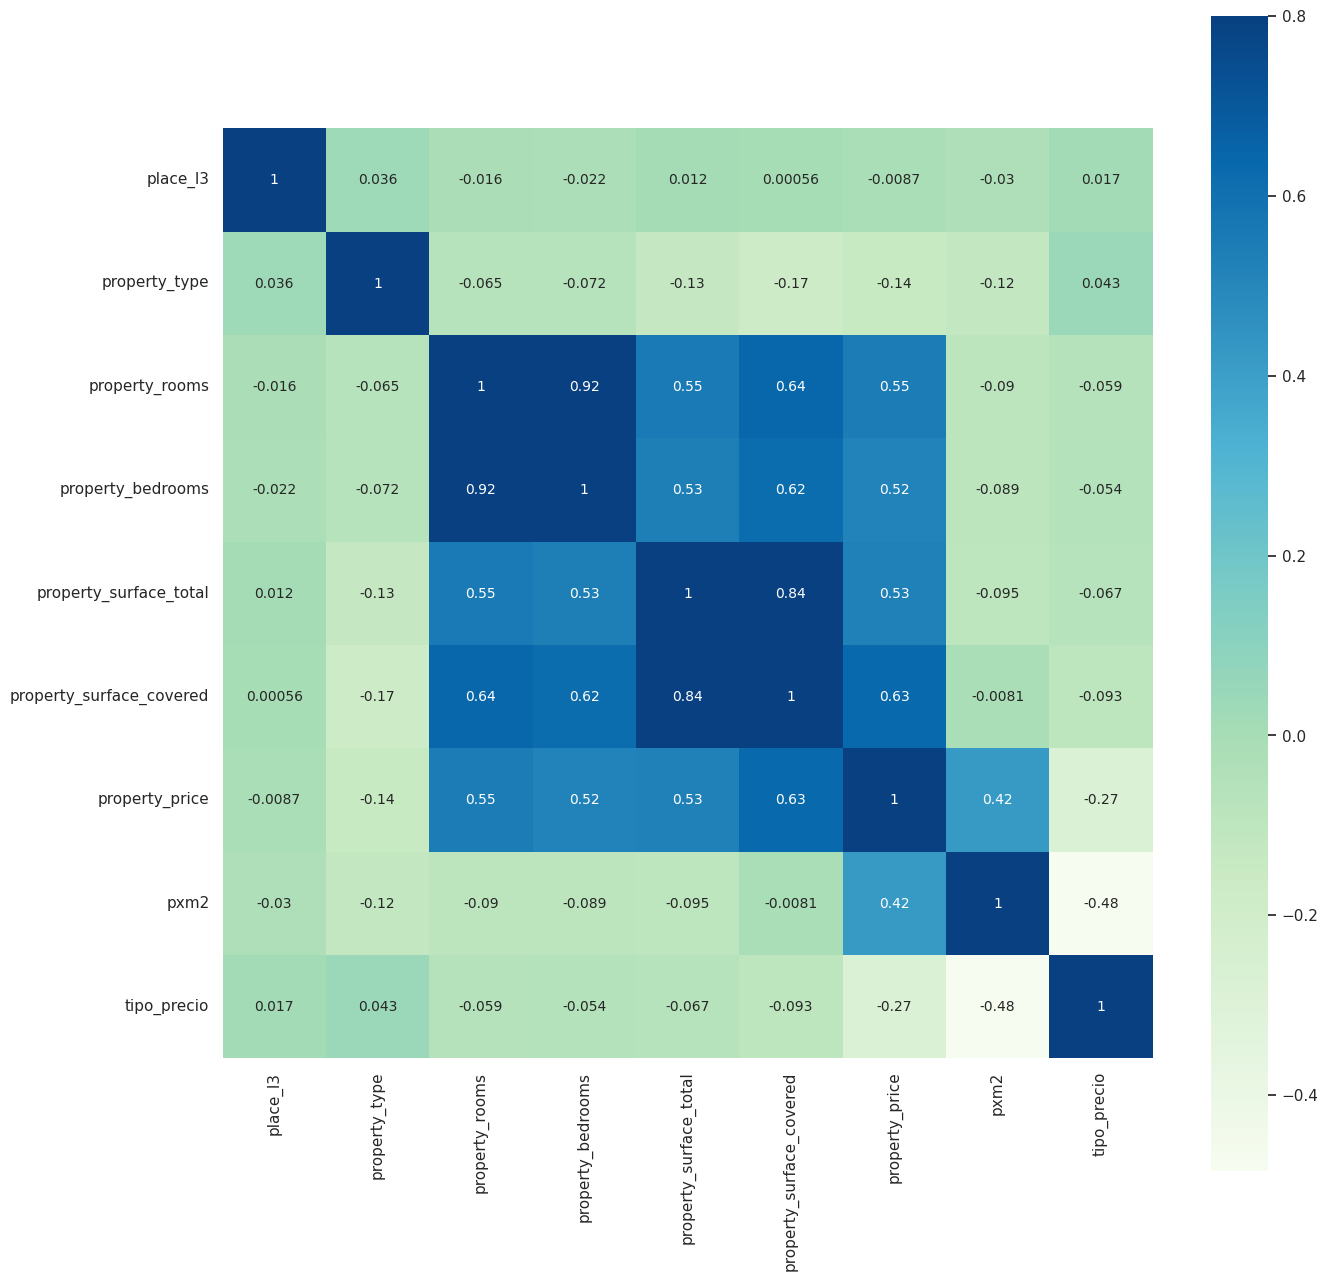

In [13]:
sns.set(style= "whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmax=0.8, square=True,cmap="GnBu",linecolor="r", annot=True,annot_kws={'size':10})

Para modelos supervisados espero que mi base de datos tenga relaciones, si son modelos no supervisados no espero tener relaciones.

En modelos de regresiones quiero variables dependientes.

No se quiere **extremos** ni **medios**.

In [14]:
df = df.drop(columns=(['property_bedrooms']))

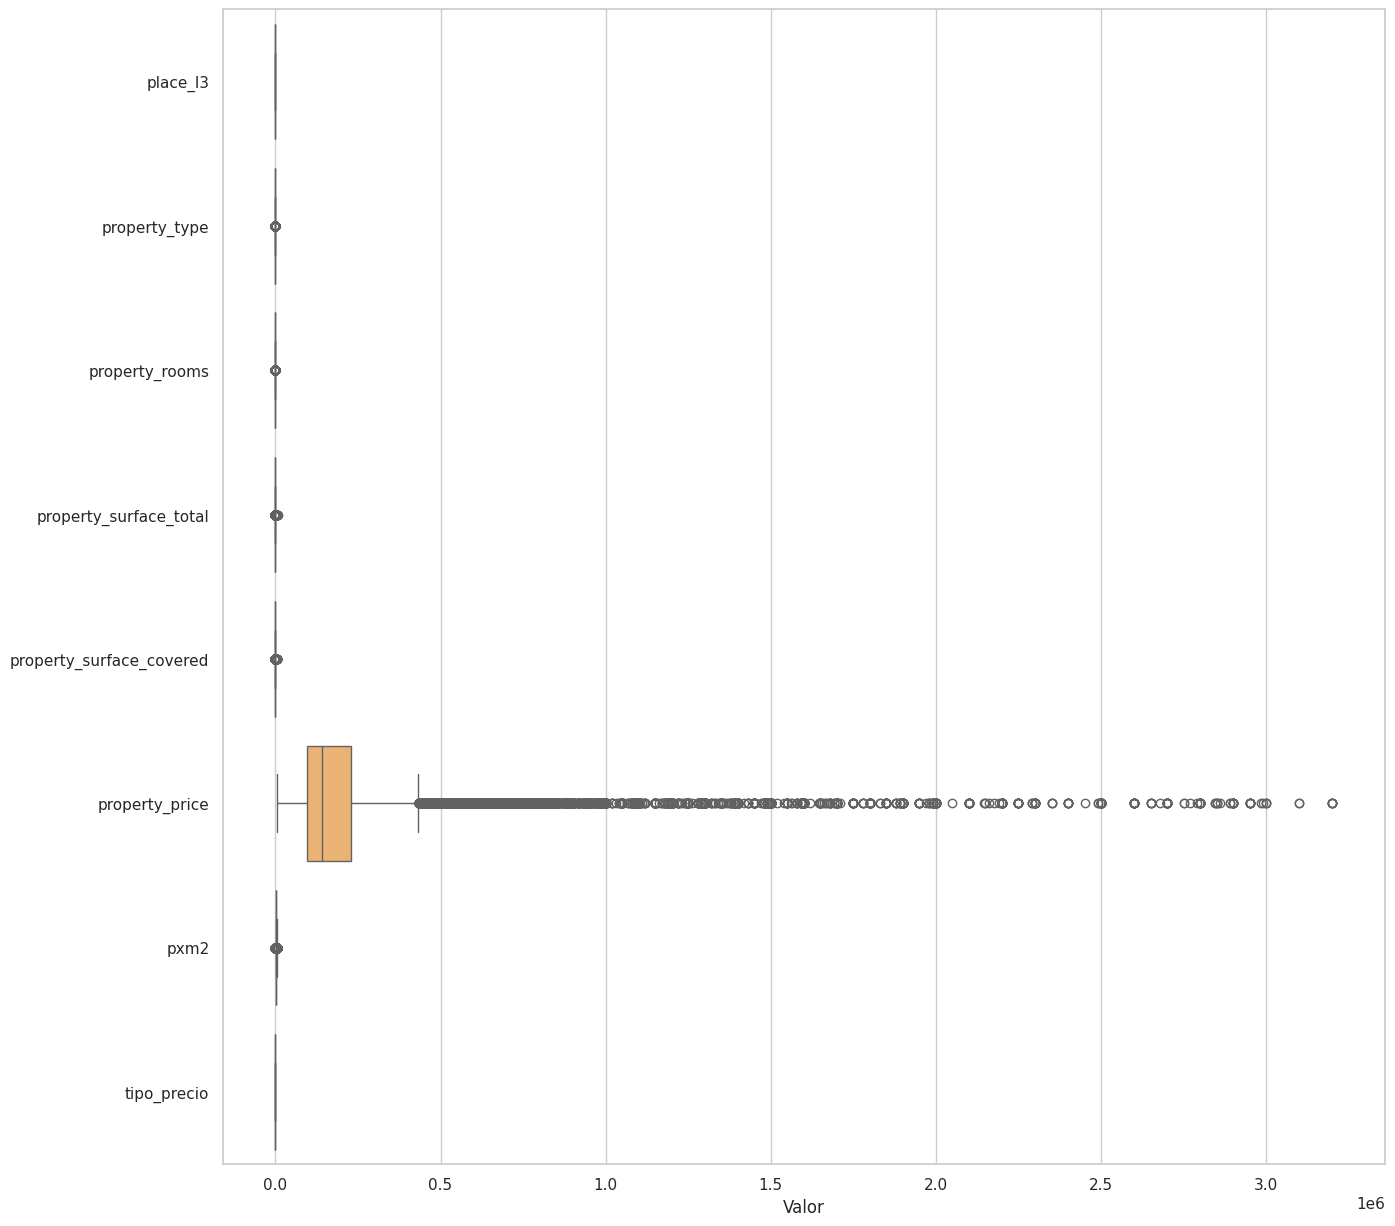

In [15]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient='h',palette='Set3')
plt.xlabel("Valor")
plt.show()

In [16]:
col = df.columns[:]
for i in col:
  q1 = df[i].quantile(0.10)
  q4 = df[i].quantile(0.90)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-16-9b783fe16cde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-16-9b783fe16cde>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4
<ipython-input-16-9b783fe16cde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-16-9b783fe16cde>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

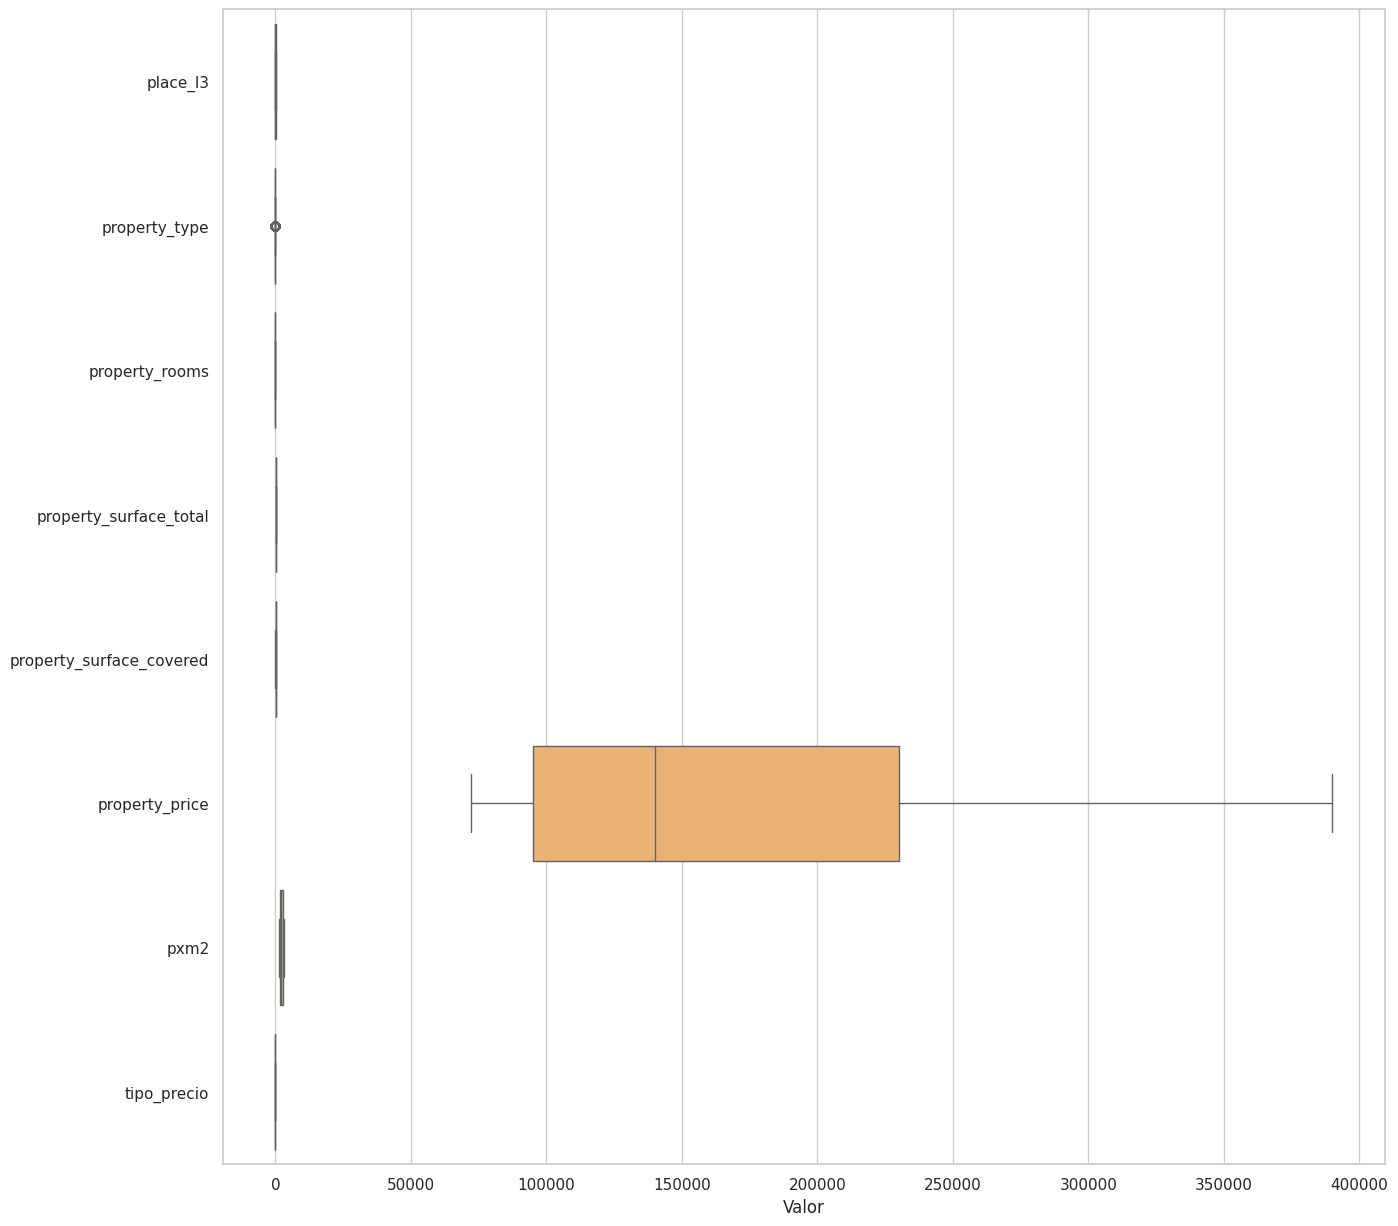

In [17]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient='h',palette='Set3')
plt.xlabel("Valor")
plt.show()

In [18]:
df

,place_l3,property_type,property_rooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
0,26,1,4,171.000000,133.0,210000.0,1370.0,1
1,7,1,3,58.000000,55.0,82900.0,1429.0,1
2,7,1,4,70.000000,70.0,99000.0,1414.0,1
3,25,1,4,135.327513,104.0,146000.0,1370.0,1
4,8,2,4,106.415511,73.0,250000.0,2349.0,2
...,...,...,...,...,...,...,...,...
82502,48,1,4,130.000000,100.0,220000.0,1692.0,1
82503,48,1,3,68.000000,60.0,161000.0,2368.0,2
82504,48,1,1,51.000000,32.0,75500.0,1480.0,1
82505,48,1,1,37.000000,32.0,74500.0,2014.0,2


In [19]:
X= df.drop('pxm2', axis=1)  # Caracteristicas
y= df['pxm2'] #Mi etiqueta

In [20]:
mmax = MinMaxScaler()
X = mmax.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2000)
# random_state es la semilla.
# Aprendizaje supervisado, separa la base de datos en 70% para predecir y 30% para probar.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [23]:
ann_model =  Sequential()
ann_model.add(Dense(units=7, activation='relu'))
ann_model.add(Dense(units=5, activation='relu'))
ann_model.add(Dense(units=1))
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=80, batch_size=1000, verbose=1)
ann_model.summary()

Epoch 1/80
58/58 [==============================] - 1s 2ms/step - loss: 5478719.0000
Epoch 2/80
58/58 [==============================] - 0s 2ms/step - loss: 5474794.0000
Epoch 3/80
58/58 [==============================] - 0s 2ms/step - loss: 5466391.0000
Epoch 4/80
58/58 [==============================] - 0s 2ms/step - loss: 5450579.5000
Epoch 5/80
58/58 [==============================] - 0s 2ms/step - loss: 5424489.0000
Epoch 6/80
58/58 [==============================] - 0s 2ms/step - loss: 5384042.0000
Epoch 7/80
58/58 [==============================] - 0s 2ms/step - loss: 5325000.5000
Epoch 8/80
58/58 [==============================] - 0s 2ms/step - loss: 5243286.0000
Epoch 9/80
58/58 [==============================] - 0s 2ms/step - loss: 5136722.0000
Epoch 10/80
58/58 [==============================] - 0s 2ms/step - loss: 5004264.0000
Epoch 11/80
58/58 [==============================] - 0s 2ms/step - loss: 4845765.5000
Epoch 12/80
58/58 [==============================] - 0s 2ms/ste

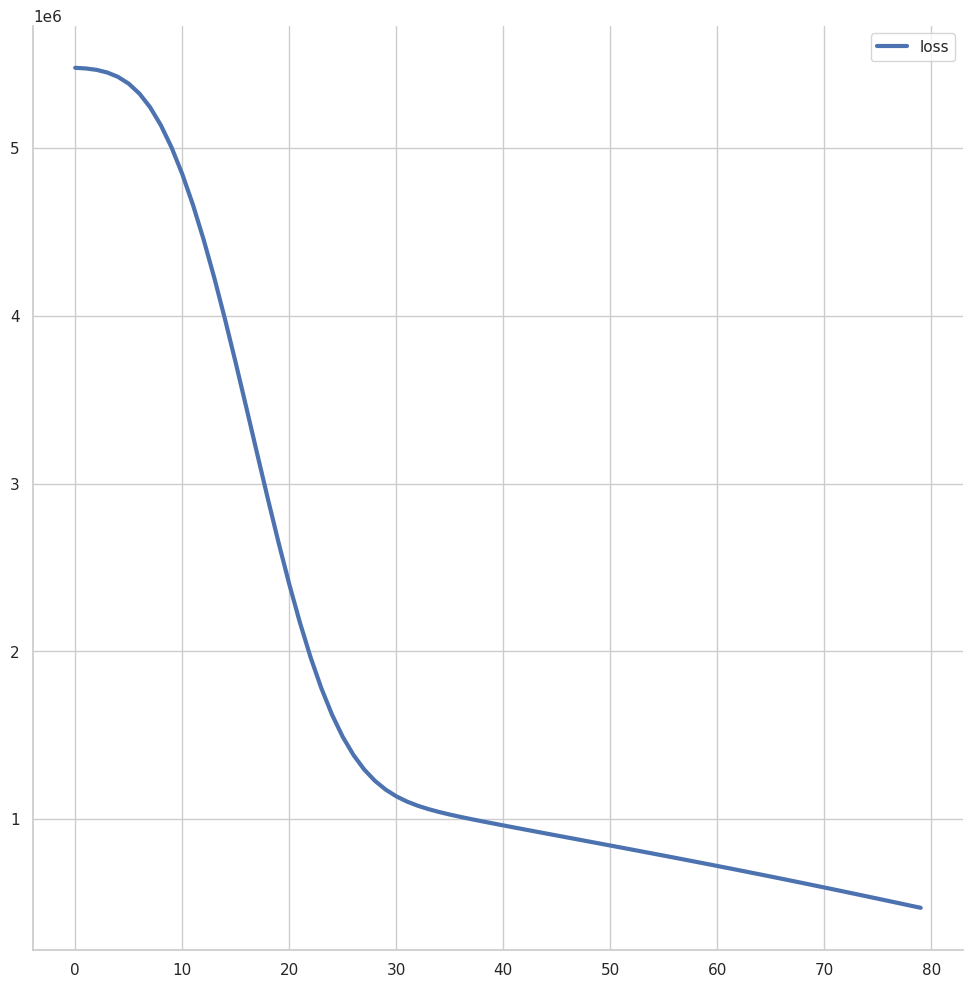

In [24]:
loss = pd.DataFrame(ann_model.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

    Atipicos, escalamos y borrar las correlaciones